In [46]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [54]:
# Read the data
# 1- Simulated Time Series
#dataset = pd.read_csv('Simulated_Data.csv', index_col=[0])

# 2- Beijing PM2.5 Data Data Set 
# 2.1- Hourly data
dataset = pd.read_csv('Beijing_hourly.csv', index_col=['date'])

# 2.2- Daily resampled data
#dataset = pd.read_csv('Beijing_daily.csv')

dataset = dataset.values

In [55]:
# A dataframe of K features
data = dataset
n_input = 20
n_out = 7

def split_dataset(data): # data is np.array of size T*n_features
    T = data.shape[0]
    split_ratio = 0.7
    t_split = np.int(np.floor(split_ratio * T))
    # split into train and test
    train, test = data[0: t_split], data[t_split:]
    return train, test



# convert data (train or test) into inputs (X) and outputs (y)
def to_supervised(data, n_input, n_out):
    #idx_interest_var = 0 # gives the column index of the series in the data {0, 1, 2,..., n_feature-1}
    X = []
    y = []
    T_tr = data.shape[0]
    
    for i in range(T_tr - n_input - n_out + 1):
        X.append(data[i: i + n_input])
        y.append(data[i + n_input: i + n_input + n_out])
    X = np.array(X)
    y = np.array(y)
    
    # X and y have shapes of (#samples, n_input, n_feature) and (#samples, n_out, n_features) repectively.
    # y is always univariate (even if n_features>1), we should reshape it to (#samples, n_out)
    # In case of univariate analysis, X should also be reshaped to (#samples, n_out, 1)
    
    X = X[:,:, idx_interest_var]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = y[:,:, idx_interest_var]
    
    return X, y
    
def build_model(train, n_input, n_out):
    # prepare data_ univarite case
    train_x, train_y = to_supervised(train, n_input, n_out)
    # define parameters
    verbose, epochs, batch_size = 1, 20, 4
    n_timesteps, n_features, n_outputs = train_x.shape[1], 1, train_y.shape[1] # n_features is 1 for a univariate case
    # define model
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model, train_x, train_y

def evaluate(test, n_input, n_out, model):
    # prepare data
    test_x, test_y = to_supervised(test, n_input, n_out)
    y_hat = model.predict(test_x)
    n = y_hat.shape[0] 
    prediction_error = y_hat - test_y
    mse = np.sum(prediction_error**2, axis=0)/n   
    score = np.mean(mse)
    
    return mse, score, test_x, test_y, y_hat

In [30]:
train, test = split_dataset(data) 

score_list = []
mse_list = []
y_hat_list = []
test_y_list = []
for idx_interest_var in range(dataset.shape[1]):
    m, train_x, train_y = build_model(train, n_input, n_out)
    mse, score, test_x, test_y, y_hat = evaluate(test, n_input, n_out, m)
    score_list.append(score)
    mse_list.append(mse)
    y_hat_list.append(y_hat)
    test_y_list.append(test_y)

Epoch 1/20
674/674 [==============================] - 3s 4ms/step - loss: 19.0103
Epoch 2/20
674/674 [==============================] - 1s 2ms/step - loss: 4.5017
Epoch 3/20
674/674 [==============================] - 1s 2ms/step - loss: 2.9385
Epoch 4/20
674/674 [==============================] - 1s 2ms/step - loss: 2.6863
Epoch 5/20
674/674 [==============================] - 1s 1ms/step - loss: 2.4253A: 0s - loss: 2.43
Epoch 6/20
674/674 [==============================] - 1s 1ms/step - loss: 2.2221
Epoch 7/20
674/674 [==============================] - 1s 918us/step - loss: 2.0832
Epoch 8/20
674/674 [==============================] - 1s 953us/step - loss: 1.9702
Epoch 9/20
674/674 [==============================] - 1s 987us/step - loss: 1.9140 0s - loss:
Epoch 10/20
674/674 [==============================] - 1s 1ms/step - loss: 1.8668
Epoch 11/20
674/674 [==============================] - 1s 1ms/step - loss: 1.8322
Epoch 12/20
674/674 [==============================] - 1s 1ms/step - lo

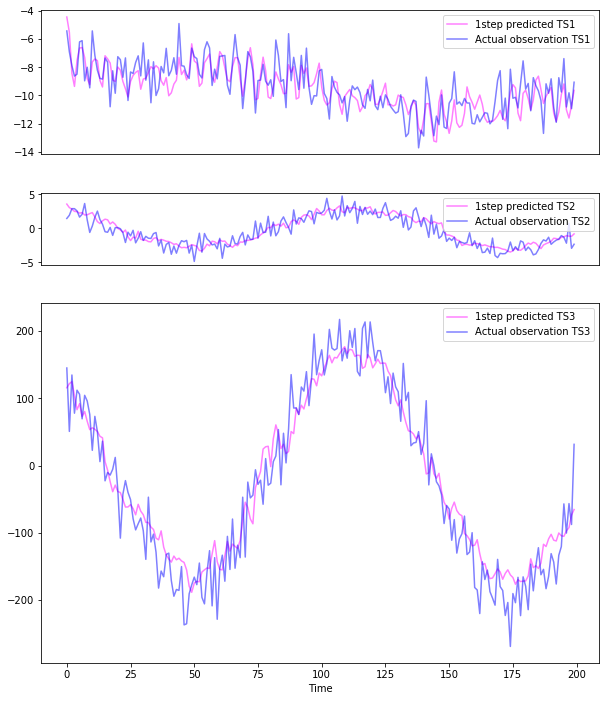

In [27]:

f, (a0, a1, a2) = plt.subplots(3,1, gridspec_kw = {'height_ratios':[2, 1,5]}, figsize=(10, 12))
a0.plot(y_hat_list[0][-200:], 'magenta', test_y_list[0][-200:], 'b',alpha = 0.5)
a0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a0.legend(['1step predicted TS1', 'Actual observation TS1' ])

a1.plot(y_hat_list[1][-200:], 'magenta', test_y_list[1][-200:], 'b' ,alpha = 0.5)
a1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a1.legend(['1step predicted TS2', 'Actual observation TS2' ])

a2.plot(y_hat_list[2][-200:], 'magenta', test_y_list[2][-200:], 'b',alpha = 0.5)
a2.legend(['1step predicted TS3', 'Actual observation TS3' ])
a2.set_xlabel('Time');
plt.savefig(r'C:\Users\Javad\Dropbox\McGill ECON MA and PhD\2018\9- Fall 2018\1- ECON 706- Machine Learning\Project\Pics\1step_predict_CNN_sim')


In [16]:
mse_list


[array([1.41868637]), array([1.21049636]), array([1330.26067667])]

In [56]:
# results for TS1 and/or pm2.5 only
train, test = split_dataset(data) 

idx_interest_var=0
m, train_x, train_y = build_model(train, n_input, n_out)
mse, score, test_x, test_y, y_hat = evaluate(test, n_input, n_out, m)


Epoch 1/20
29203/29203 [==============================] - 46s 2ms/step - loss: 3905.8608
Epoch 2/20
29203/29203 [==============================] - 51s 2ms/step - loss: 3396.3664
Epoch 3/20
29203/29203 [==============================] - 48s 2ms/step - loss: 3306.6694 0s
Epoch 4/20
29203/29203 [==============================] - 51s 2ms/step - loss: 3279.2015
Epoch 5/20
29203/29203 [==============================] - 56s 2ms/step - loss: 3256.1405
Epoch 6/20
29203/29203 [==============================] - 51s 2ms/step - loss: 3235.2422 0s - loss: 3
Epoch 7/20
29203/29203 [==============================] - 50s 2ms/step - loss: 3214.0706
Epoch 8/20
29203/29203 [==============================] - 52s 2ms/step - loss: 3195.5640
Epoch 9/20
29203/29203 [==============================] - 53s 2ms/step - loss: 3190.5361
Epoch 10/20
29203/29203 [==============================] - 49s 2ms/step - loss: 3182.1150
Epoch 11/20
29203/29203 [==============================] - 51s 2ms/step - loss: 3180.0769
Epo

In [57]:
mse, score

(array([1090.61324587, 1682.18204009, 2276.93045762, 2822.94216958,
        3339.955238  , 3827.82881954, 4245.13655781]), 2755.084075501538)

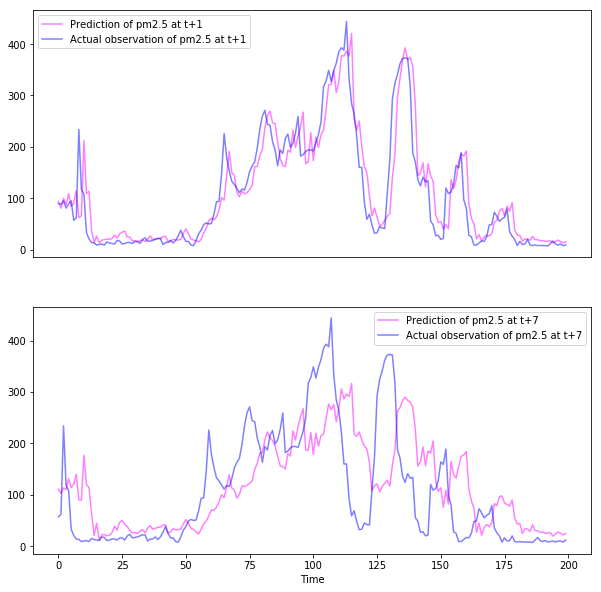

In [59]:
f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]}, figsize=(10, 10))
a0.plot(y_hat[-200:, 0], 'magenta', test_y[-200:, 0], 'b',alpha = 0.5)
a0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a0.legend(['Prediction of pm2.5 at t+1', 'Actual observation of pm2.5 at t+1' ])



a1.plot(y_hat[-200:, 6], 'magenta', test_y[-200:, 6], 'b',alpha = 0.5)
a1.legend(['Prediction of pm2.5 at t+7', 'Actual observation of pm2.5 at t+7' ])
a1.set_xlabel('Time');
plt.savefig(r'C:\Users\Javad\Dropbox\McGill ECON MA and PhD\2018\9- Fall 2018\1- ECON 706- Machine Learning\Project\Pics\Multistep_predict_CNN_pm25')

